In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv("boston_housing_cleaned.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Summary statistics
desc_stats = df.describe().T
desc_stats['median'] = df.median()
desc_stats['range'] = df.max() - df.min()
desc_stats[['mean', 'median', 'std', 'range']].round(2)


,mean,median,std,range
crim,2.23,0.26,3.31,9.06
zn,6.96,0.00,12.03,31.25
indus,11.14,9.69,6.86,27.28
chas,0.07,0.00,0.25,1.00
nox,0.55,0.54,0.12,0.49
rm,6.28,6.21,0.63,2.95
age,68.57,77.50,28.15,97.10
dis,3.78,3.21,2.07,8.69
rad,9.55,5.00,8.71,23.00
tax,408.24,330.00,168.54,524.00


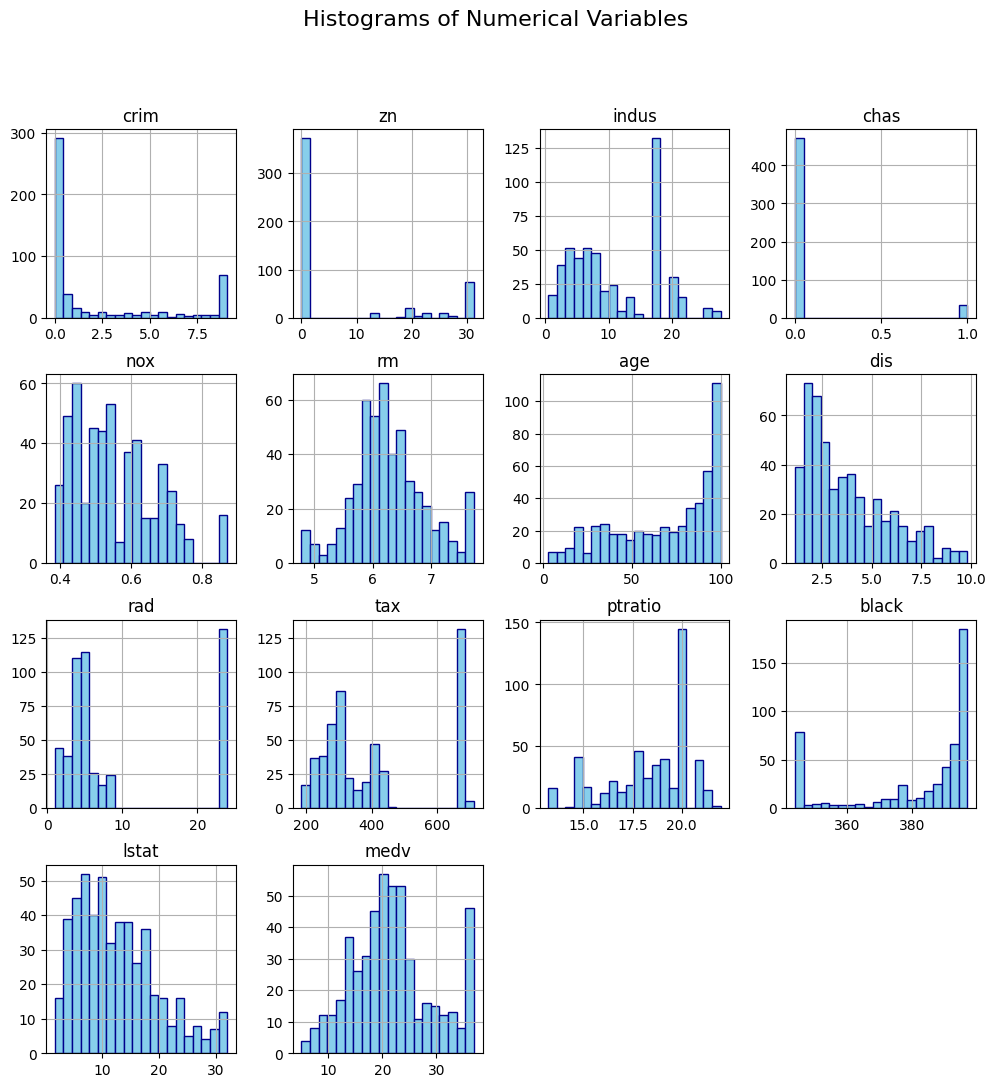

In [4]:
# List of numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Histograms
df[numeric_cols].hist(figsize=(12, 12), bins=20, color='skyblue', edgecolor='darkblue')
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()


In [5]:
# Standardize numerical features
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)


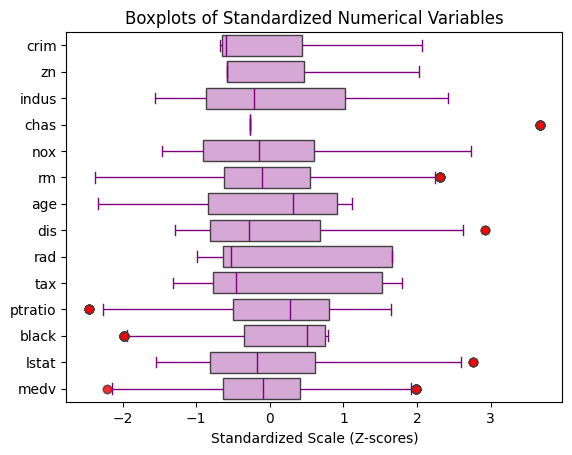

In [6]:
# plt.figure(figsize=(8, 8))
sns.boxplot(
    data=scaled_data,
    orient='h',
    color='plum',
    whiskerprops=dict(color='purple'),
    capprops=dict(color='purple'),
    medianprops=dict(color='purple'),
    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.6)
)
plt.title("Boxplots of Standardized Numerical Variables")
plt.xlabel("Standardized Scale (Z-scores)")
plt.show()


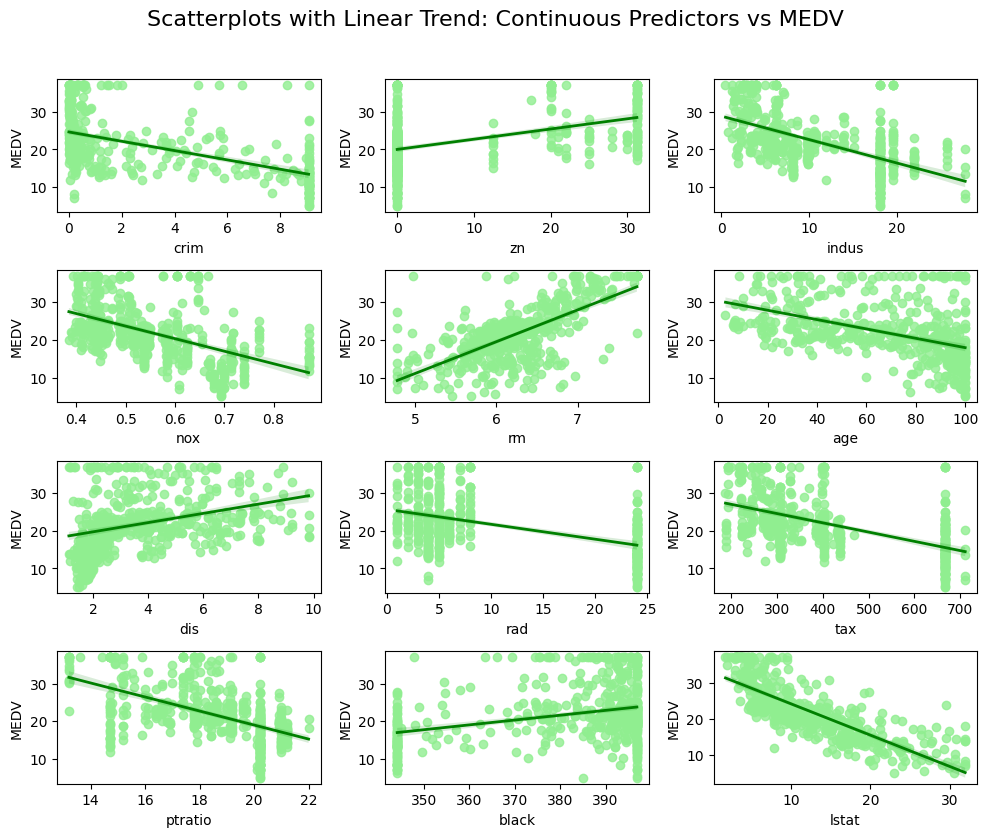

In [7]:
# Bivariate Analysis - Relationships with MEDV with linear trend line

# Continuous predictors (numeric with more than 2 unique values)
continuous_cols = [col for col in numeric_cols if df[col].nunique() > 2 and col != 'medv']

plt.figure(figsize=(10, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(5, 3, i)  # adjust grid size depending on number of predictors
    sns.regplot(x=df[col], y=df['medv'],
                scatter=True, color='lightgreen', line_kws={'color': 'green', 'linewidth': 2})
    plt.xlabel(col)
    plt.ylabel('MEDV')
plt.suptitle("Scatterplots with Linear Trend: Continuous Predictors vs MEDV", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


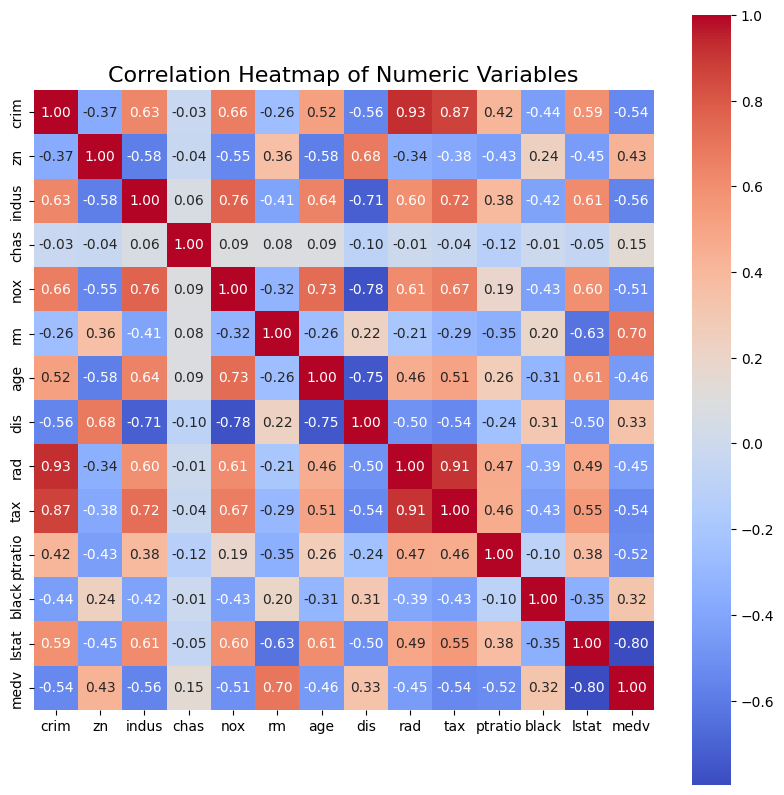

In [8]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)
plt.show()


medv       1.000000
rm         0.697645
zn         0.428126
dis        0.333079
black      0.321250
chas       0.146061
rad       -0.452679
age       -0.458662
nox       -0.506505
ptratio   -0.523993
crim      -0.538589
tax       -0.543545
indus     -0.561174
lstat     -0.797200
Name: medv, dtype: float64


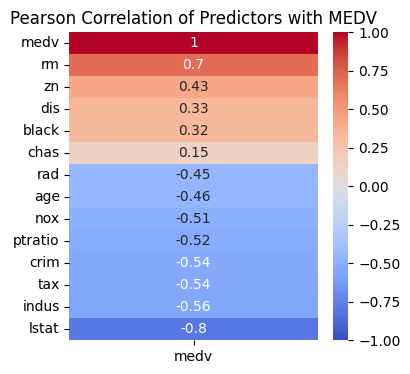

In [9]:
# Compute correlations with MEDV
medv_corr = df.corr()['medv'].sort_values(ascending=False)

# Display correlations
print(medv_corr)

# Heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(medv_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation of Predictors with MEDV")
plt.show()
